In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv("./Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
feature=['N','P','K','temperature','humidity','ph','rainfall']

Text(0.5, 1.0, 'Correlation')

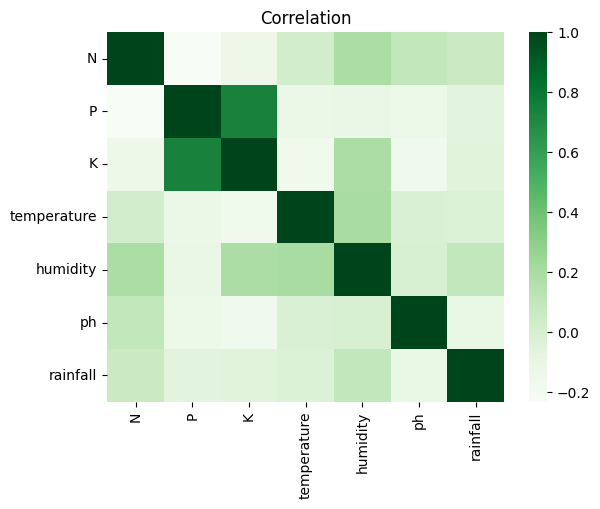

In [8]:
corr_mat=data[feature].corr()
sns.heatmap(corr_mat,cmap="Greens")
plt.title("Correlation")

In [9]:
fig=px.box(data['N'],points='all',width=500)
fig.show()
fig=px.box(data['K'],points='all',width=500)
fig.show()
fig=px.box(data['P'],points='all',width=500)
fig.show()
fig=px.box(data['temperature'],points='all',width=500)
fig.show()
fig=px.box(data['humidity'],points='all',width=500)
fig.show()
fig=px.box(data['ph'],points='all',width=500)
fig.show()
fig=px.box(data['rainfall'],points='all',width=500)
fig.show()

In [10]:
# Assuming 'data' is your DataFrame and 'n', 'k', 'p' are the columns you want to analyze
columns_to_analyze = feature

# Create a copy of the original data to keep it unchanged
data_cleaned = data.copy()

for column in columns_to_analyze:
    # Calculate the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_index = (data[column] < lower_bound) | (data[column] > upper_bound)
    data_cleaned = data_cleaned[~outliers_index]

# Display information about removed outliers
print("Number of rows removed due to outliers:", len(data) - len(data_cleaned))

# Now, 'data_cleaned' contains the dataset without outliers


Number of rows removed due to outliers: 432


C:\Users\pbhuv\AppData\Local\Temp\ipykernel_3340\2101804209.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\pbhuv\AppData\Local\Temp\ipykernel_3340\2101804209.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\pbhuv\AppData\Local\Temp\ipykernel_3340\2101804209.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\pbhuv\AppData\Local\Temp\ipykernel_3340\2101804209.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\pbhuv\AppData\Local\Temp\ipykernel_3340\2101804209.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



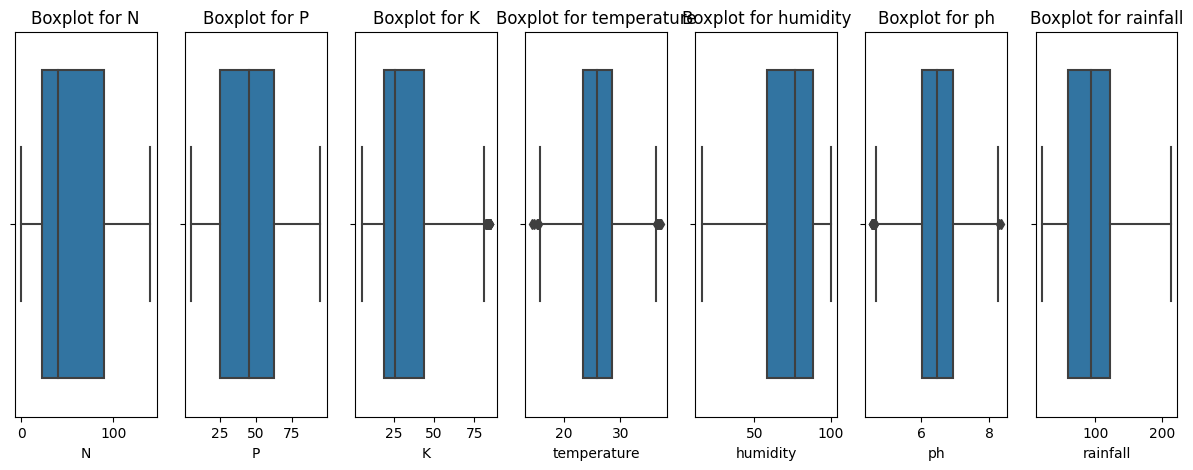

In [11]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(1, 7, i)
    
    # Boxplot to visualize the distribution and identify potential outliers
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot for {column}')
plt.show()

In [12]:
data=data_cleaned.copy()

In [13]:
data.shape

(1768, 8)

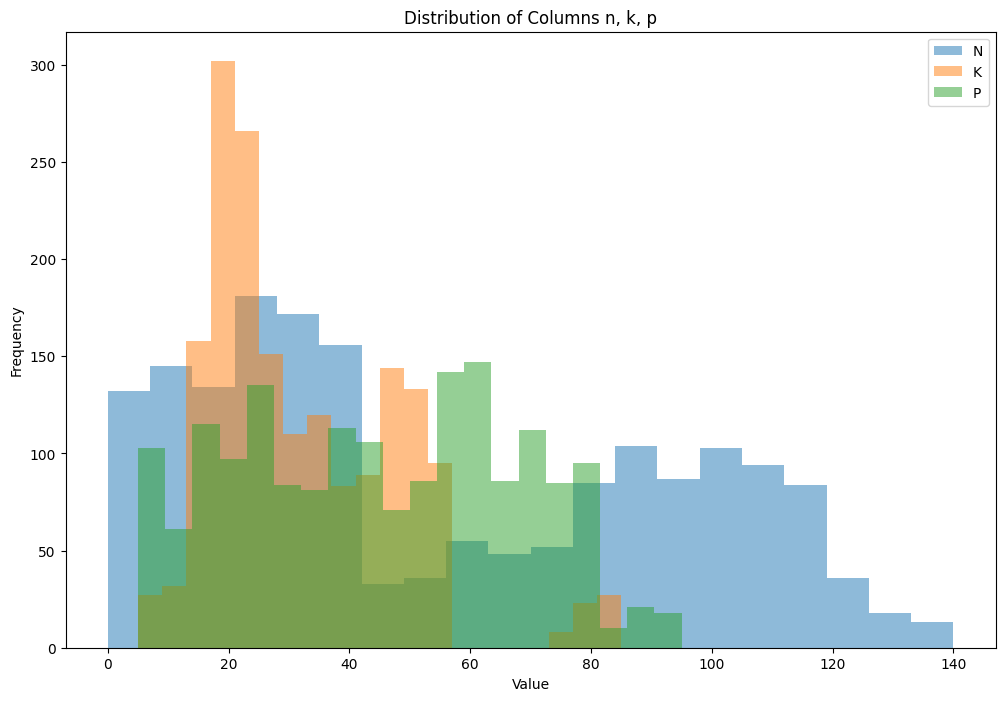

In [14]:
columns_to_plot = ['N', 'K', 'P']

plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    plt.hist(data[column], bins=20, alpha=0.5, label=column)

plt.title('Distribution of Columns n, k, p')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

d:\coding\python-DS\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



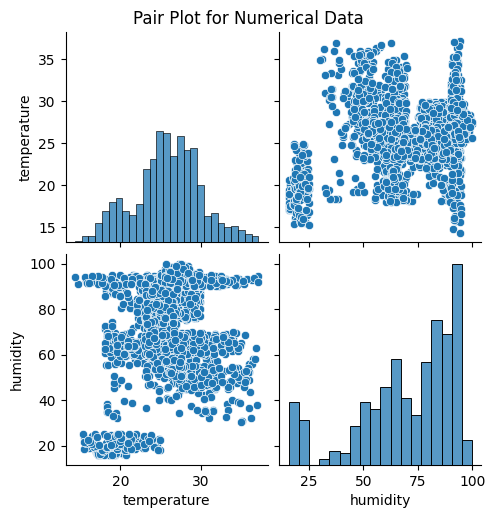

In [15]:
sns.pairplot(data[['temperature','humidity']])
plt.suptitle('Pair Plot for Numerical Data', y=1.02)
plt.show()


In [16]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [17]:
crop_dict={
    'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'watermelon':13, 'muskmelon':14, 'orange':15, 'papaya':16,
       'coconut':17, 'cotton':18, 'jute':19, 'coffee':20
}
data['crop_num']=data['label'].map(crop_dict)

In [18]:
data['crop_num'].value_counts()

crop_num
11    100
9     100
19    100
18    100
14    100
13    100
2     100
10    100
20    100
8     100
7     100
5     100
4     100
12     98
17     85
15     83
6      58
3      58
16     54
1      32
Name: count, dtype: int64

In [19]:
X=data[feature]
y=data['crop_num']

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
X_train=mn.fit_transform(X_train)
X_test=mn.fit_transform(X_test)

In [22]:
print(X_test)

[[0.28358209 0.15555556 0.325      ... 0.4013706  0.33086845 0.36995147]
 [0.23880597 0.7        0.175      ... 0.02922809 0.23908921 0.68231321]
 [0.26865672 0.57777778 0.1375     ... 0.49834612 0.98720518 0.1922341 ]
 ...
 [0.69402985 0.56666667 0.4625     ... 0.80038572 0.74216812 0.92203062]
 [0.03731343 0.76666667 0.2        ... 0.0674556  0.25994704 0.24478404]
 [0.19402985 0.54444444 0.15       ... 0.88143982 0.44326696 0.15238301]]


In [23]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rfc.predict(X_test))

0.9774011299435028

In [26]:
datai = {}
for col in feature:
    value = int(input(f"Enter value for {col}: "))
    datai[col] = [value]

In [ ]:
data_input=pd.DataFrame(datai)
data_input.head()

,N,P,K,temperature,humidity,ph,rainfall
0,20,72,15,36,56,7,134


In [ ]:
data_input=mn.transform(data_input)
data_input=sc.transform(data_input)
print(data_input)

[[-0.8366994   1.1700114  -1.08013172  2.34740458 -0.65301635  0.74039658
   0.79474146]]


In [ ]:
crop_rdict={}
for k,x in crop_dict.items():
    crop_rdict[x]=k
print(crop_rdict)

{1: 'rice', 2: 'maize', 3: 'chickpea', 4: 'kidneybeans', 5: 'pigeonpeas', 6: 'mothbeans', 7: 'mungbean', 8: 'blackgram', 9: 'lentil', 10: 'pomegranate', 11: 'banana', 12: 'mango', 13: 'watermelon', 14: 'muskmelon', 15: 'orange', 16: 'papaya', 17: 'coconut', 18: 'cotton', 19: 'jute', 20: 'coffee'}


In [ ]:
pred=rfc.predict(data_input)
print(crop_rdict[pred[0]])

pigeonpeas
